# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

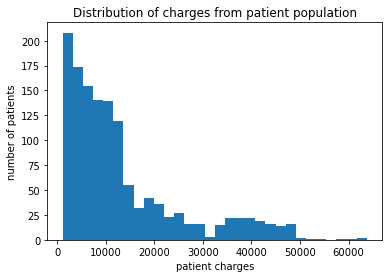

In [4]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('patient charges')
_ = plt.ylabel('number of patients')
_ = plt.title('Distribution of charges from patient population')

In [5]:
np.mean(medical.charges) # Since we have a large number of patients this sample mean should 
                         # approximate the mean of a normal distribution as it is an
                         # unbiased estimator of the population mean
                         # which approximates the mean of the population as n increases

13270.422265141257

In [6]:
np.std(medical.charges)  # Since we have a large number of patients this std should approximate
                         # the standard deviation of a normal distribution,
                         # We are using the mean from this large sample and we are
                         # using the uncorrected formula
                         # which approximates the standard deviation of the population as n increases
                         # this is a biased estimator but the bias decreases as n increases
    

12105.484975561612

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I think the right approach would be to administer the CLT and say that the mean and std deviation of this sample are approaching the actual mean and standard deviation because of the large size of the sample

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ We need an actual number rather than "less than 12000", we would ask the administrator what the number is, let's suppose it is 11000. With this large sample, one assumption we can make is that as n approaches infinity the standard error vanishes, and we just use the population standard deviation, which is biased but also the best estimator available when n is large. We can calculate the z value, let's say that the actual value from the administrator is 11000.

In [7]:
# With a z value of 11000 which is below 12000

Z = (11000 - np.mean(medical.charges))/np.std(medical.charges)
print(f"our average of 11000 is {Z} standard deviations away from the mean")

our average of 11000 is -0.1875531851656298 standard deviations away from the mean


In [8]:
# A 95% confidence interval assuming our sample parameters are 
# approaching the population parameters because it is such a large sample
# would be

Z = 1.96


lcl = np.mean(medical.charges) - Z*np.std(medical.charges)
ucl = np.mean(medical.charges) + Z*np.std(medical.charges)

(lcl, ucl)

(-10456.328286959502, 36997.17281724201)

In [9]:
# Based on this 11000 is not below the lower control limit, if we get below 10456 then we
# should be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The variances are equal

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [11]:
insurance = medical[medical['insuranceclaim'] == 1]

In [12]:
insurance_mean = np.mean(insurance.charges)
insurance_mean

16423.928276537677

In [13]:
no_insurance = medical[medical['insuranceclaim']==0]

In [14]:
no_insurance_mean = np.mean(no_insurance.charges)
no_insurance_mean

8821.421892306305

In [15]:
pooled_std = np.sqrt(((len(insurance['charges'])-1)*np.std(insurance['charges'])**2+(len(no_insurance['charges'])-1)*np.std(no_insurance['charges'])**2)/(len(insurance['charges'])+len(no_insurance['charges'])-2))
pooled_std

11512.282899205748

In [16]:
t_statistic = (insurance_mean - no_insurance_mean)/(pooled_std*np.sqrt((1/len(insurance['charges'])+(1/len(no_insurance['charges'])))))
t_statistic

11.901306943555388

In [17]:
insurance_a = insurance['charges'].values

In [18]:
insurance_b = no_insurance['charges'].values

In [19]:
from scipy.stats import ttest_ind

ttest_ind(insurance_a, insurance_b, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  I can't find one for the t-test, but there could be one, it would just be approximating from the normal distribution instead of the t distribution, when n is large they should be very similar. I'll make this example with another library

In [20]:
import statsmodels.api as sm
print(sm.stats.ttest_ind(insurance_a, insurance_b))

(11.893299030876708, 4.461230231620972e-31, 1336.0)


In [21]:
print(sm.stats.ztest(insurance_a, insurance_b))

(11.893299030876712, 1.2823915835129942e-32)


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test